In [1]:
#import required libraries and classification algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [5]:
#Train data, in this case retrieved from basic investigation. This example will take the species described from Oliveira et al., 2024 in the Northern Tiger Cat complex: 
#Andean lineage (Leopardus pardinoides; ANTig)
#North east Brazil lineage (Leopardus tigrinus; NETig)
#South east Brazil lineage (Leopardus guttulus, SETig)
Tig = pd.read_csv('TigEx.csv',sep=';')

In [7]:
Tig.head(2)

,Lat,Lon,Ubi,3Class,Grupo,Lin,Elev,Srad,Vapr,Wind,...,Bio5,Bio6,Bio7,Bio8,Bio9,Tcan,ECO_NUM,ECO_NAME,BIOME_NUM,BIOME_NAME
0,-4.131,-38.234,(Brasil),NETig,NETig,NETig,38,17908.91602,2.615833,2.741667,...,31.200001,21.299999,9.900002,26.500000,26.733334,10,86,Caatinga,2,Tropical & Subtropical Dry Broadleaf Forests
1,-4.231,-38.411,"(CearÃ¡, Brasil)",NETig,NETig,NETig,36,18069.25000,2.602500,2.283333,...,31.299999,21.200001,10.099998,26.549999,26.316668,7,86,Caatinga,2,Tropical & Subtropical Dry Broadleaf Forests


In [9]:
#Testing data, in this case the classification will be done for all Norther tiger cat records, including subspecies records.
#If having only one dataset, data split into train and test could be done with the following code line:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
GBIF = pd.read_csv('GBIFEx.csv',sep=';')

In [11]:
GBIF.head(2)

,gbifID,Lat,Lon,acceptedScientificName,infraspecificEpithet,3Class,Group,level0Gid,level0Name,level1Name,...,Bio5,Bio6,Bio7,Bio8,Bio9,Tcan,ECO_NUM,ECO_NAME,BIOME_NUM,BIOME_NAME
0,4046412509,-27.729671,-54.916796,"Leopardus guttulus (Hensel, 1872)",NaN,SETig,SETig,ARG,Argentina,Misiones,...,31.6,10.0,21.6,18.150000,17.016666,20,22,Alto Paraná Atlantic forests,1,Tropical & Subtropical Moist Broadleaf Forests
1,699207416,-25.684080,-54.446690,"Leopardus tigrinus (Schreber, 1775)",NaN,SETig,SETig,ARG,Argentina,Misiones,...,31.5,9.4,22.1,23.033333,17.316666,20,22,Alto Paraná Atlantic forests,1,Tropical & Subtropical Moist Broadleaf Forests


In [95]:
#Columns of environnmental variable data that are predictors
X_train = Tig[['Lat', 'Lon','Elev', 'Srad', 'Vapr', 'Wind', 'Bio1', 'Bio10','Bio11', 'Bio12', 'Bio13', 'Bio14', 'Bio15', 'Bio16', 'Bio17', 'Bio18', 'Bio19', 'Bio2', 'Bio3', 'Bio4', 'Bio5', 'Bio6', 'Bio7', 'Bio8', 'Bio9', 'Tcan', 'BIOME_NUM']] .values
X_test = GBIF[['Lat', 'Lon','Elev', 'Srad', 'Vapr', 'Wind', 'Bio1', 'Bio10','Bio11', 'Bio12', 'Bio13', 'Bio14', 'Bio15', 'Bio16', 'Bio17', 'Bio18', 'Bio19', 'Bio2', 'Bio3', 'Bio4', 'Bio5', 'Bio6', 'Bio7', 'Bio8', 'Bio9', 'Tcan', 'BIOME_NUM']] .values  

In [97]:
#Lineage of Northern Tiger Cat (ANTig, NETig or SETig)
Y_train = Tig['Grupo'].values
Y_test = GBIF['Group'].values

In [21]:
#Data transformation
X = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X2 = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Confusion matrix definition
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['ANTig', 'CATig', 'NETig', 'SETig']); ax.yaxis.set_ticklabels(['ANTig', 'CATig', 'NETig', 'SETig']) 
    plt.show() 

kNN Classification

In [29]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [31]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sa

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [33]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1}
accuracy : 0.975


In [35]:
knn_accuracy = knn_cv.score(X_test, Y_test)
knn_accuracy

0.89798087141339

In [37]:
KNNyhat = knn_cv.predict(X_test)

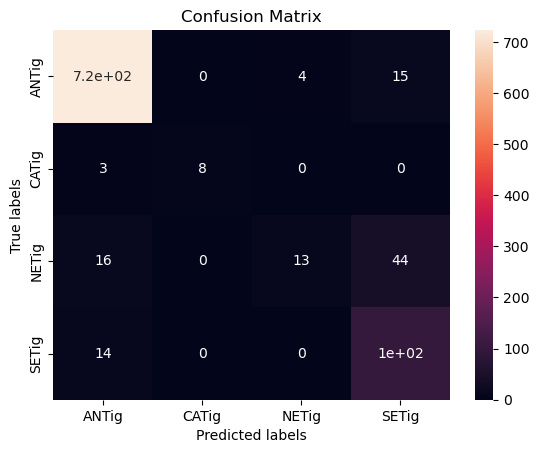

In [39]:
plot_confusion_matrix(Y_test,KNNyhat)

Logistis regression classification

In [41]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [43]:
logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [45]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8950000000000001


In [47]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
logreg_accuracy

0.9064824654622742

In [49]:
logregyhat=logreg_cv.predict(X_test)

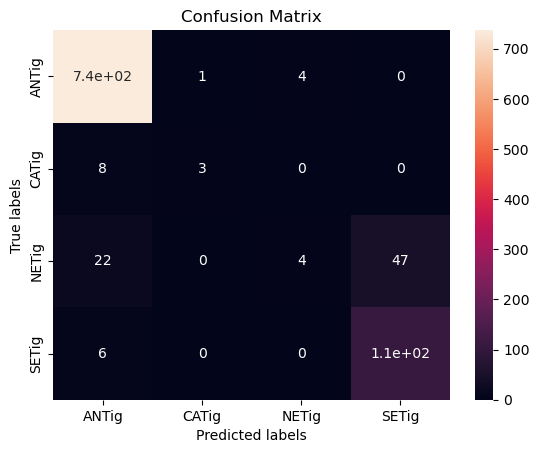

In [51]:
plot_confusion_matrix(Y_test,logregyhat)

Decision tree classification

In [53]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [55]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._val

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [57]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9800000000000001


In [59]:
tree_accuracy = tree_cv.score(X_test, Y_test)
tree_accuracy

0.8384697130712009

In [61]:
treeyhat = tree_cv.predict(X_test)

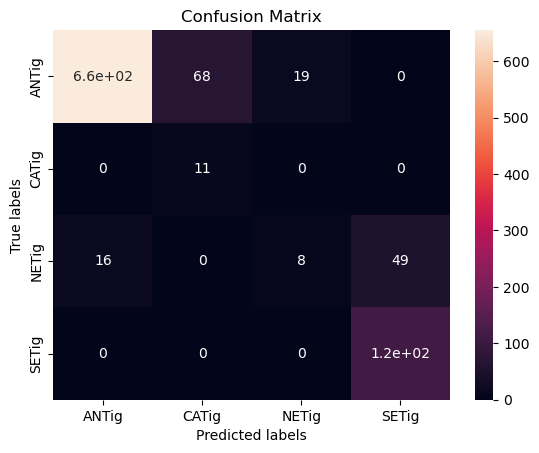

In [63]:
plot_confusion_matrix(Y_test,treeyhat)

Support Vector Machine classification

In [65]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [67]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [69]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}
accuracy : 0.915


In [71]:
svm_accuracy = svm_cv.score(X_test, Y_test)
svm_accuracy

0.8969181721572795

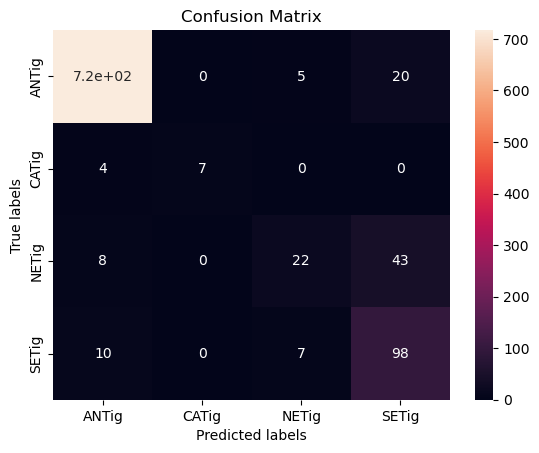

In [73]:
SVMyhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,SVMyhat)

Gaussian Naive Bayes classification

In [75]:
gbn = GaussianNB()
gbn.fit(X_train, Y_train)

GaussianNB()

In [77]:
gbn_accuracy = gbn.score(X_test, Y_test)
gbn_accuracy

0.9139213602550478

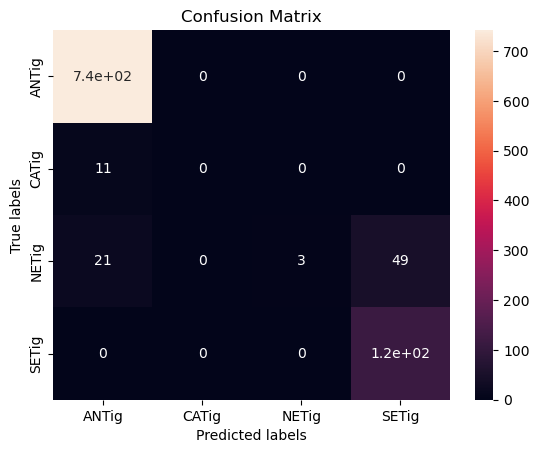

In [79]:
GBNyhat=gbn.predict(X_test)
plot_confusion_matrix(Y_test,GBNyhat)

Neural Network classification

In [81]:
clf = MLPClassifier()


In [87]:
clf.fit(X_train,Y_train)

MLPClassifier()

In [89]:
clf_accuracy = clf.score(X_test, Y_test)
clf_accuracy

0.077577045696068

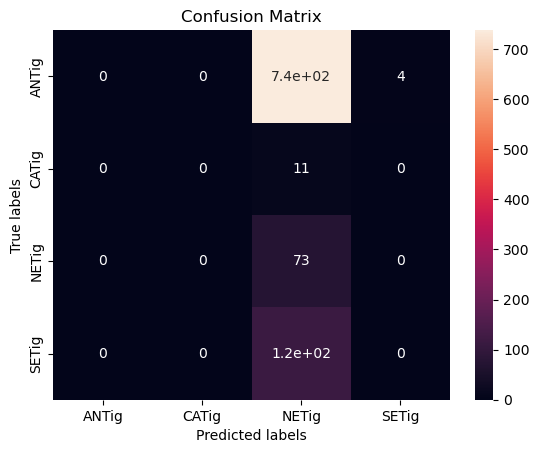

In [91]:
clfyhat=clf.predict(X_test)
plot_confusion_matrix(Y_test,clfyhat)

In [93]:
from sklearn.metrics import jaccard_score, f1_score

In [111]:
#jaccard, f1 and accuracy scores of each algorithm
jaccard_scores = [
                  jaccard_score(Y_test, logregyhat, average='micro'),
                  jaccard_score(Y_test, SVMyhat, average='micro'),
                  jaccard_score(Y_test, treeyhat, average='micro'),
                  jaccard_score(Y_test, KNNyhat, average='micro'),
                  jaccard_score(Y_test, GBNyhat, average='micro'),
                  jaccard_score(Y_test, clfyhat, average='micro')
                 ]

f1_scores = [
             f1_score(Y_test, logregyhat, average='micro'),
             f1_score(Y_test, SVMyhat, average='micro'),
             f1_score(Y_test, treeyhat, average='micro'),
             f1_score(Y_test, KNNyhat, average='micro'),
             f1_score(Y_test, GBNyhat, average='micro'),
             f1_score(Y_test, clfyhat, average='micro')
            ]

accuracy = [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy,gbn_accuracy,clf_accuracy]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]), index=['Jaccard_Score', 'F1_Score', 'Accuracy'] , columns=['LogReg', 'SVM', 'Tree', 'KNN', 'GBN','NeuNet'])
scores

,LogReg,SVM,Tree,KNN,GBN,NeuNet
Jaccard_Score,0.828960,0.813102,0.721866,0.814851,0.841487,0.040354
F1_Score,0.906482,0.896918,0.838470,0.897981,0.913921,0.077577
Accuracy,0.906482,0.896918,0.838470,0.897981,0.913921,0.077577


In [113]:
#Creating data frame with each algorithm prediction and Test sample
predicted = pd.DataFrame(columns=['Gbif','kNN', 'SVM', 'Tree', 'LogReg', 'GaussBN','NeuralNet'])
predicted = predicted.assign(Gbif=Y_test,kNN=KNNyhat,SVM=SVMyhat,Tree=treeyhat,LogReg=logregyhat,GaussBN=GBNyhat,NeuralNet=clfyhat)
predicted

,Gbif,kNN,SVM,Tree,LogReg,GaussBN,NeuralNet
0,SETig,SETig,SETig,SETig,SETig,SETig,NETig
1,SETig,SETig,SETig,SETig,SETig,SETig,NETig
2,SETig,SETig,SETig,SETig,SETig,SETig,NETig
3,SETig,SETig,SETig,SETig,SETig,SETig,NETig
4,SETig,SETig,SETig,SETig,SETig,SETig,NETig
...,...,...,...,...,...,...,...
936,NETig,NETig,NETig,ANTig,SETig,ANTig,NETig
937,SETig,SETig,NETig,SETig,SETig,SETig,NETig
938,NETig,NETig,NETig,NETig,SETig,ANTig,NETig
939,ANTig,NETig,ANTig,CATig,ANTig,ANTig,NETig


Example of clustering with deap learning

In [159]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [161]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 100000)

In [163]:
k_means.fit(X_test)

C:\Users\Rolli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, n_init=100000)

In [166]:
k_means_labels = k_means.labels_


In [168]:
k_means_cluster_centers = k_means.cluster_centers_


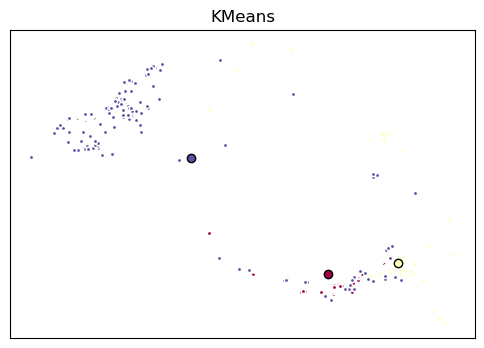

In [170]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X_test[my_members, 0], X_test[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
